In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Reading the dataset:

In [14]:
# Reading the dataset
df = pd.read_csv('Battery_RUL.csv')
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


Random Forest Regression:

In [15]:
#  Preprocessing
X = df.drop("RUL", axis=1).drop("Cycle_Index", axis=1)
y = df["RUL"]

## Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train the model
model = RandomForestRegressor(n_estimators=100, oob_score=True)
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)


# Evaluate the model
oob_score = model.oob_score_
r2 = r2_score(y_test, predictions)

print('Model Evaluation:')
print(f'Out-of-Bag Score: {oob_score * 100:.2f}%')
print(f'R2 Score: {r2 * 100:.2f}%')
print()


Model Evaluation:
Out-of-Bag Score: 99.47%
R2 Score: 99.31%



In [16]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature Ranking:")
for feature in range(X.shape[1]):
    print("%d. feature %d (%f)" % (feature + 1, indices[feature], importances[indices[feature]]))


Feature Ranking:
1. feature 0 (0.880482)
2. feature 1 (0.067863)
3. feature 2 (0.017819)
4. feature 5 (0.014850)
5. feature 3 (0.008042)
6. feature 4 (0.005636)
7. feature 6 (0.005308)


Visualizing Predictions VS Actual Values:

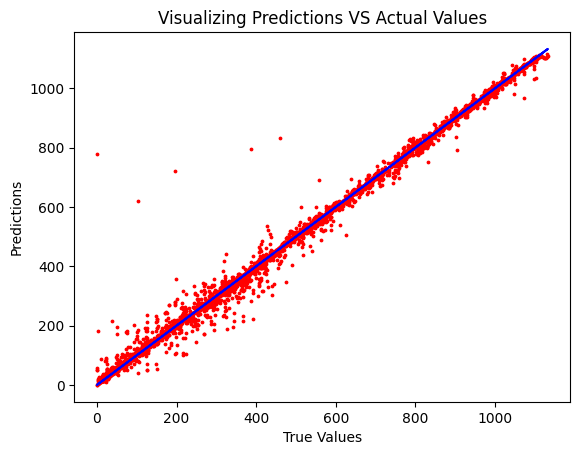

In [17]:
plt.plot(y_test, y_test, color='blue')
plt.scatter(y_test, predictions, s=3, color='red')
plt.title("Visualizing Predictions VS Actual Values")
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

Visualizing Error Distribution:

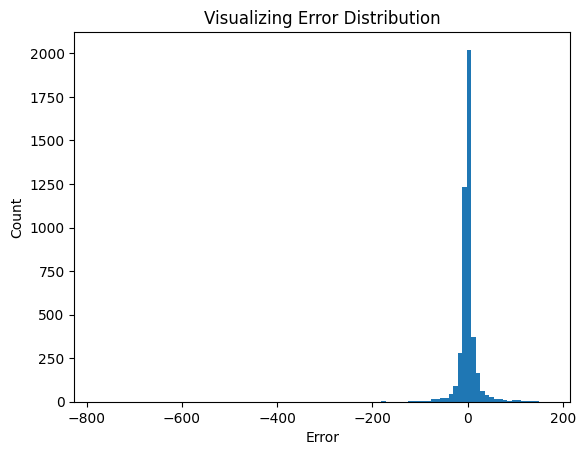

In [18]:
errors = y_test - predictions
plt.hist(errors, bins=100)
plt.title("Visualizing Error Distribution")
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()
